<a href="https://colab.research.google.com/github/romillodaya/classifiers/blob/main/NewClassifierDriverCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import time
import random
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# Setup working directory and data directory
DIR = '/content/drive/MyDrive/DeepLearning/Classifiers'
DATA_DIR = DIR + '/Data/'
os.chdir(DIR)

In [4]:
# Load MNIST Data
file = DATA_DIR+'MNISTData/mnist.csv'
X = pd.read_csv(file, sep=',').to_numpy()
y = X[:, 1]
X = X[:, 2:].T
num_features, num_samples = X.shape
num_labels = np.unique(y).shape[0]
print('MNIST data set')
print('--------------')
print('Number of samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))
print('Number of output labels = %d'%(num_labels))

MNIST data set
--------------
Number of samples = 69998
Number of features = 784
Number of output labels = 10


In [ ]:
# Load simulated data
file = DATA_DIR+'SimulatedData/simulated2Ddata.csv'
X = pd.read_csv(file, sep=',', header = None).to_numpy()
y = X[-1, :].astype('int64')
X = X[:-1, :]
num_features, num_samples = X.shape
num_labels = np.unique(y).shape[0]
print('Simulated 2D data set')
print('---------------------')
print('Number of samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))
print('Number of output labels = %d'%(num_labels))

In [5]:
# Split data into "train" and "test" sets
train_proportion = 0.9
test_proportion = 0.1
idx = random.sample(np.arange(num_samples).tolist(), num_samples)
X_train, X_test = np.split(X[:, idx], [int(train_proportion*num_samples)], axis = 1)
y_train, y_test = np.split(y[idx], [int(train_proportion*num_samples)])

print('Training data size = ')
print(X_train.shape)
print('Test data size = ')
print(X_test.shape)

Training data size = 
(784, 62998)
Test data size = 
(784, 7000)


In [6]:
## Preprocessing step-1
# Normalize the samples (images)
xmax = np.amax(X_train)
xmin = np.amin(X_train)
X_train = (X_train - xmin) / (xmax - xmin) # all train features turn into a number between 0 and 1
X_test = (X_test - xmin)/(xmax - xmin)

In [ ]:
## Preprocessing step-2
# Subtract mean training sample (image) from all train and test samples
X_train_mean = np.mean(X_train, axis = 1).reshape(-1, 1)
X_train = X_train - X_train_mean
X_test = X_test - X_train_mean

In [7]:
## Preprocessing step-3
# Bias trick: append the bias dimension of ones to the train/validate/test matrix
# so that the classifier can deal with a single weight matrix W.
X_train = np.vstack([X_train, np.ones((1, X_train.shape[1]))])
X_test = np.vstack([X_test, np.ones((1, X_test.shape[1]))])
num_features += 1

In [8]:
from LinearClassifiers.linear_classifier import *

# **(This was written before filling)**

We are trying find the best combination of regularization and learning rate so we are doing grid search by taking combinations of both and doing k-fold on each combination.

So, we are training (k * number_of_reg * number_of_lr) times

# **(Waiting for training to complete)**

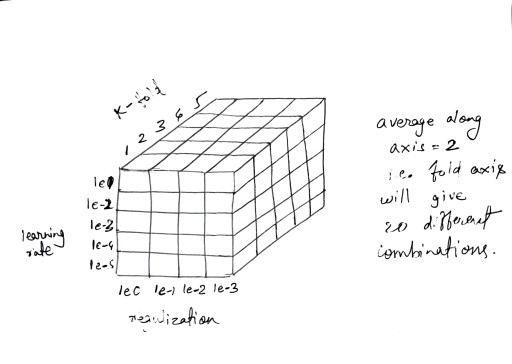

In [11]:
# Grid search for identifying optimal hyperparameters using 
# k-fold cross-validation by splitting train data into sub-train
# validation sets

regularization_strengths = [1e0, 1e-01, 1e-02, 1e-03] # regularization strengths
learning_rates = [1e-01, 1e-02, 1e-04, 1e-04, 1e-05] # learning rates

# Build grid of hyperparameters
grid_search = [(lr, rg) for lr in learning_rates for rg in regularization_strengths]

num_samples_train = X_train.shape[1]
train_sub_proportion = 0.8 # this mean validation proportion = 1-train_sub_proportion = 1-0.8 = 0.2

# k-fold cross validation loop 
kfold = 3
for lr, rg in grid_search:
  validation_accuracy = []  
  for k in np.arange(kfold):
      # Split train data into sub-train and validation sets
      idx = random.sample(np.arange(num_samples_train).tolist(), num_samples_train)
      X_sub_train, X_validate = np.split(X_train[:, idx],
                                         [int(train_sub_proportion*num_samples_train)], axis = 1)
      y_sub_train, y_validate = np.split(y_train[idx],
                                         [int(train_sub_proportion*num_samples_train)])
      
      # Call classifier object
      softmaxclassifierObject = Softmax()
      #svmclassifierObject = LinearSVM()
      
      # Train classifier object on sub-train dataset
      it_loss_hist, epoch_loss_hist = softmaxclassifierObject.train(X_sub_train, y_sub_train,
                                                                    learning_rate = lr,
                                                                    reg = rg,
                                                                    num_iters = 30000,
                                                                    batch_size = 32,
                                                                    verbose = False)
      
      # Test trained clasifier object on validation set
      y_validate_pred = softmaxclassifierObject.predict(X_validate)
      validation_accuracy.append(np.mean(y_validate == y_validate_pred))
  print('For lr = %1.0e, reg = %1.0e, mean validation accuracy = %f, sd. dev = %f'%(lr, rg, np.mean(validation_accuracy), np.std(validation_accuracy)))    

For lr = 1e-01, reg = 1e+00, mean validation accuracy = 0.533545, sd. dev = 0.079164
For lr = 1e-01, reg = 1e-01, mean validation accuracy = 0.821058, sd. dev = 0.017058
For lr = 1e-01, reg = 1e-02, mean validation accuracy = 0.887196, sd. dev = 0.000652
For lr = 1e-01, reg = 1e-03, mean validation accuracy = 0.912725, sd. dev = 0.002293
For lr = 1e-02, reg = 1e+00, mean validation accuracy = 0.678810, sd. dev = 0.005878
For lr = 1e-02, reg = 1e-01, mean validation accuracy = 0.841455, sd. dev = 0.005523
For lr = 1e-02, reg = 1e-02, mean validation accuracy = 0.892672, sd. dev = 0.001160
For lr = 1e-02, reg = 1e-03, mean validation accuracy = 0.909709, sd. dev = 0.001663
For lr = 1e-04, reg = 1e+00, mean validation accuracy = 0.761005, sd. dev = 0.003750
For lr = 1e-04, reg = 1e-01, mean validation accuracy = 0.815688, sd. dev = 0.003001
For lr = 1e-04, reg = 1e-02, mean validation accuracy = 0.821931, sd. dev = 0.002395
For lr = 1e-04, reg = 1e-03, mean validation accuracy = 0.822011,

In [13]:
# Train the best hyperparameter model on the full train data and evaluate 
# accuracy for test data
softmaxclassifierObject = Softmax()
it_loss_hist, epoch_loss_hist = softmaxclassifierObject.train(X_train, y_train,
                                                              learning_rate = 1e-01,
                                                              reg = 1e-03,
                                                              num_iters = 30000,
                                                              batch_size = 32,
                                                              verbose = False)
y_test_pred = softmaxclassifierObject.predict(X_test)
print('Test accuracy: %f' % (np.mean(y_test == y_test_pred)))

Test accuracy: 0.913571


In [14]:
# Train the best hyperparameter model on the full train data and evaluate 
# accuracy for test data
softmaxclassifierObject = Softmax()
it_loss_hist, epoch_loss_hist = softmaxclassifierObject.train(X_train, y_train,
                                                              learning_rate = 1e-02,
                                                              reg = 1e-03,
                                                              num_iters = 30000,
                                                              batch_size = 32,
                                                              verbose = False)
y_test_pred = softmaxclassifierObject.predict(X_test)
print('Test accuracy: %f' % (np.mean(y_test == y_test_pred)))

Test accuracy: 0.915429
